<a href="https://colab.research.google.com/github/AsSakina/Code_Projects/blob/main/Customer_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [980]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from io import StringIO
import plotly.graph_objects as go
from scipy.stats import mstats
from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

#Data Explorer

In [981]:
#Load our dataset

data = pd.read_csv('technical_case_data.csv')

In [982]:
#Print out the dataset

data

,CustomerID,PurchaseDate,ProductID,ProductCategory,ProductPrice,Quantity,TotalPrice
0,1,2024-04-06 03:04:22,P016,Accessories,222.099545,4,888.398178
1,2,2024-04-29 22:21:13,P011,Clothing,400.038092,2,800.076183
2,3,2024-04-27 09:00:55,P099,Electronics,959.102132,2,1918.204263
3,4,2024-04-28 22:35:11,P039,Electronics,400.024264,2,800.048529
4,5,2024-04-08 14:14:58,P073,Accessories,654.112213,4,2616.448850
...,...,...,...,...,...,...,...
995,996,2024-04-26 05:10:14,P014,Accessories,53.959260,4,215.837039
996,997,2024-04-10 08:22:12,P093,Accessories,36.747983,2,73.495965
997,998,2024-04-10 20:48:17,P067,Accessories,612.670878,4,2450.683512
998,999,2024-04-30 08:14:59,P046,Clothing,356.695588,1,356.695588


In [983]:
#Get Informations about our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   PurchaseDate     995 non-null    object 
 2   ProductID        1000 non-null   object 
 3   ProductCategory  995 non-null    object 
 4   ProductPrice     1000 non-null   float64
 5   Quantity         1000 non-null   int64  
 6   TotalPrice       1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [984]:
data.nunique()

,0
CustomerID,1000
PurchaseDate,995
ProductID,99
ProductCategory,3
ProductPrice,1000
Quantity,4
TotalPrice,1000


#Calculating Summary Statistics

In [985]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
ProductPrice,1000.0,535.473118,516.974352,12.496399,265.711043,510.115225,761.558086,9544.731323
Quantity,1000.0,2.475000,1.096621,1.000000,1.000000,3.000000,3.000000,4.000000
TotalPrice,1000.0,1333.926862,1726.492750,12.496399,499.863333,974.741675,1816.128400,38178.925293


#Handle Missing Values

In [986]:
#Sorted by Purchase Date

sorted_data = data.sort_values(by='PurchaseDate')
sorted_data

,CustomerID,PurchaseDate,ProductID,ProductCategory,ProductPrice,Quantity,TotalPrice
773,774,2024-04-01 00:22:59,P055,Clothing,617.725742,4,2470.902967
618,619,2024-04-01 00:36:46,P015,Accessories,577.856239,2,1155.712477
208,209,2024-04-01 01:01:16,P004,Electronics,376.182419,1,376.182419
848,849,2024-04-01 02:24:01,P093,Clothing,826.690926,1,826.690926
983,984,2024-04-01 02:31:42,P051,Accessories,116.356858,2,232.713716
...,...,...,...,...,...,...,...
264,265,NaN,P070,Clothing,965.574643,1,965.574643
393,394,NaN,P026,Clothing,433.692620,1,433.692620
685,686,NaN,P025,Accessories,931.812209,3,2795.436628
738,739,NaN,P076,Electronics,894.970127,4,3579.880509


In [987]:
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 773 to 924
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   PurchaseDate     995 non-null    object 
 2   ProductID        1000 non-null   object 
 3   ProductCategory  995 non-null    object 
 4   ProductPrice     1000 non-null   float64
 5   Quantity         1000 non-null   int64  
 6   TotalPrice       1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 94.8+ KB


In [988]:
#We notice that PurchaseDate and ProductCategory have the same number of missing values
#Let's verify if it's in the same rows!

result = (sorted_data['PurchaseDate'].isnull() == sorted_data['ProductCategory'].isnull()).all()
result

False

In [989]:
#Drop Customer_ID Column and Product_ID column

sorted_data = sorted_data.drop(columns=['CustomerID', 'ProductID'])

In [990]:
#sorted_data.reset_index(drop=True, inplace=True)


In [991]:
#Convert PurchaseDate to DateTime column

sorted_data['PurchaseDate'] = pd.to_datetime(sorted_data['PurchaseDate'])

In [992]:
# Fill Missing Values using ffill

sorted = sorted_data.ffill()

In [993]:
sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 773 to 924
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PurchaseDate     1000 non-null   datetime64[ns]
 1   ProductCategory  1000 non-null   object        
 2   ProductPrice     1000 non-null   float64       
 3   Quantity         1000 non-null   int64         
 4   TotalPrice       1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 79.2+ KB


In [994]:
#Rename our DataSet to 'dataset' instead of 'sorted'

dataset = sorted

In [995]:
#dataset.info()

#Handle Outliers

In [996]:
#Handle Outliers in our Dataset using boxplot for Product Price
# Box Plot

fig = go.Figure()
fig.add_trace(go.Box(y=dataset['ProductPrice']))
fig.show()

In [997]:
#Use Winsorize to replace extreme values with values closer to the defined limits

dataset['ProductPrice_winsorize'] = mstats.winsorize(dataset['ProductPrice'], limits=[0.005, 0.005])

In [998]:
print('---------------------------------------------------------------')

# Stats Before winsorize
print("Before winsorize")

print('---------------------------------------------------------------')

print(dataset['ProductPrice'].describe())

print('---------------------------------------------------------------')

# Stats After winsorize
print("After winsorize")

print('---------------------------------------------------------------')

print(dataset['ProductPrice_winsorize'].describe())

print('---------------------------------------------------------------')


---------------------------------------------------------------
Before winsorize
---------------------------------------------------------------
count    1000.000000
mean      535.473118
std       516.974352
min        12.496399
25%       265.711043
50%       510.115225
75%       761.558086
max      9544.731323
Name: ProductPrice, dtype: float64
---------------------------------------------------------------
After winsorize
---------------------------------------------------------------
count    1000.000000
mean      510.700710
std       284.899068
min        14.845197
25%       265.711043
50%       510.115225
75%       761.558086
max       999.010433
Name: ProductPrice_winsorize, dtype: float64
---------------------------------------------------------------


In [999]:
print('---------------------------------------------------------------')

# Before winsorize
stat_before, p_value_before = shapiro(dataset['ProductPrice'])
print(f"Shapiro-Wilk Before winsorize: Stat={stat_before:.4f}, p-value={p_value_before:.4f}")

print('---------------------------------------------------------------')

# After winsorize
stat_after, p_value_after = shapiro(dataset['ProductPrice_winsorize'])
print(f"Shapiro-Wilk Aefore winsorize: Stat={stat_after:.4f}, p-value={p_value_after:.4f}")

print('---------------------------------------------------------------')


---------------------------------------------------------------
Shapiro-Wilk Before winsorize: Stat=0.4695, p-value=0.0000
---------------------------------------------------------------
Shapiro-Wilk Aefore winsorize: Stat=0.9553, p-value=0.0000
---------------------------------------------------------------


In [1000]:
#Handle Outliers in our Dataset using boxplot for Product Price
# Box Plot

fig = go.Figure()
fig.add_trace(go.Box(y=dataset['Quantity']))
fig.show()

#Didn't Detect outlier in this column

In [1001]:
#Handling with Outliers in our Datasets using boxplot
# Box Plot

fig = go.Figure()
fig.add_trace(go.Box(y=dataset['TotalPrice']))
fig.show()

- We can notice that we have 5 outliers in these 2 columns

In [1002]:
#Use Winsorize to replace extreme values with values closer to the defined limits

dataset['TotalPrice_winsorize'] = mstats.winsorize(dataset['TotalPrice'], limits=[0.005, 0.005])

In [1003]:
print('---------------------------------------------------------------')

# Stats Before winsorize
print("Before winsorize")

print('---------------------------------------------------------------')

print(dataset['TotalPrice'].describe())

print('---------------------------------------------------------------')

# Stats After winsorize
print("After winsorize")

print('---------------------------------------------------------------')

print(dataset['TotalPrice_winsorize'].describe())

print('---------------------------------------------------------------')


---------------------------------------------------------------
Before winsorize
---------------------------------------------------------------
count     1000.000000
mean      1333.926862
std       1726.492750
min         12.496399
25%        499.863333
50%        974.741675
75%       1816.128400
max      38178.925293
Name: TotalPrice, dtype: float64
---------------------------------------------------------------
After winsorize
---------------------------------------------------------------
count    1000.000000
mean     1270.681005
std       970.628585
min        20.557937
25%       499.863333
50%       974.741675
75%      1816.128400
max      3993.904363
Name: TotalPrice_winsorize, dtype: float64
---------------------------------------------------------------


In [1004]:
# Before winsorize
stat_before, p_value_before = shapiro(dataset['TotalPrice'])
print(f"Shapiro-Wilk Before winsorize: Stat={stat_before:.4f}, p-value={p_value_before:.4f}")

# After winsorize
stat_after, p_value_after = shapiro(dataset['TotalPrice_winsorize'])
print(f"Shapiro-Wilk Aefore winsorize: Stat={stat_after:.4f}, p-value={p_value_after:.4f}")


Shapiro-Wilk Before winsorize: Stat=0.4288, p-value=0.0000
Shapiro-Wilk Aefore winsorize: Stat=0.9125, p-value=0.0000


In [1005]:
# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
dataset['TotalPrice_yeojohnson'] = pt.fit_transform(dataset[['TotalPrice_winsorize']])


In [1006]:
print(dataset['TotalPrice_yeojohnson'].describe())

print('---------------------------------------------------------------')

print(dataset['TotalPrice'].describe())


count    1.000000e+03
mean     9.459100e-17
std      1.000500e+00
min     -2.442368e+00
25%     -7.200799e-01
50%     -4.851551e-02
75%      7.327670e-01
max      1.995439e+00
Name: TotalPrice_yeojohnson, dtype: float64
---------------------------------------------------------------
count     1000.000000
mean      1333.926862
std       1726.492750
min         12.496399
25%        499.863333
50%        974.741675
75%       1816.128400
max      38178.925293
Name: TotalPrice, dtype: float64


In [1007]:
# After winsorize
stat_after, p_value_after = shapiro(dataset['TotalPrice_yeojohnson'])
print(f"Shapiro-Wilk After yeojohnson: Stat={stat_after:.4f}, p-value={p_value_after:.4f}")


Shapiro-Wilk After yeojohnson: Stat=0.9886, p-value=0.0000


In [1008]:
kstest_result = stats.kstest(dataset['TotalPrice_yeojohnson'], 'norm')
print("K-S Test Statistic:", kstest_result.statistic)
print("K-S Test p-value:", kstest_result.pvalue)

K-S Test Statistic: 0.0361800474793329
K-S Test p-value: 0.14234387540796378


- The test suggests that the differences between the empirical distribution of our data and a normal distribution are minimal.


In [1009]:
dataset['TotalPrice'] = dataset['TotalPrice_yeojohnson']
dataset['ProductPrice'] = dataset['ProductPrice_winsorize']

#Visualizations

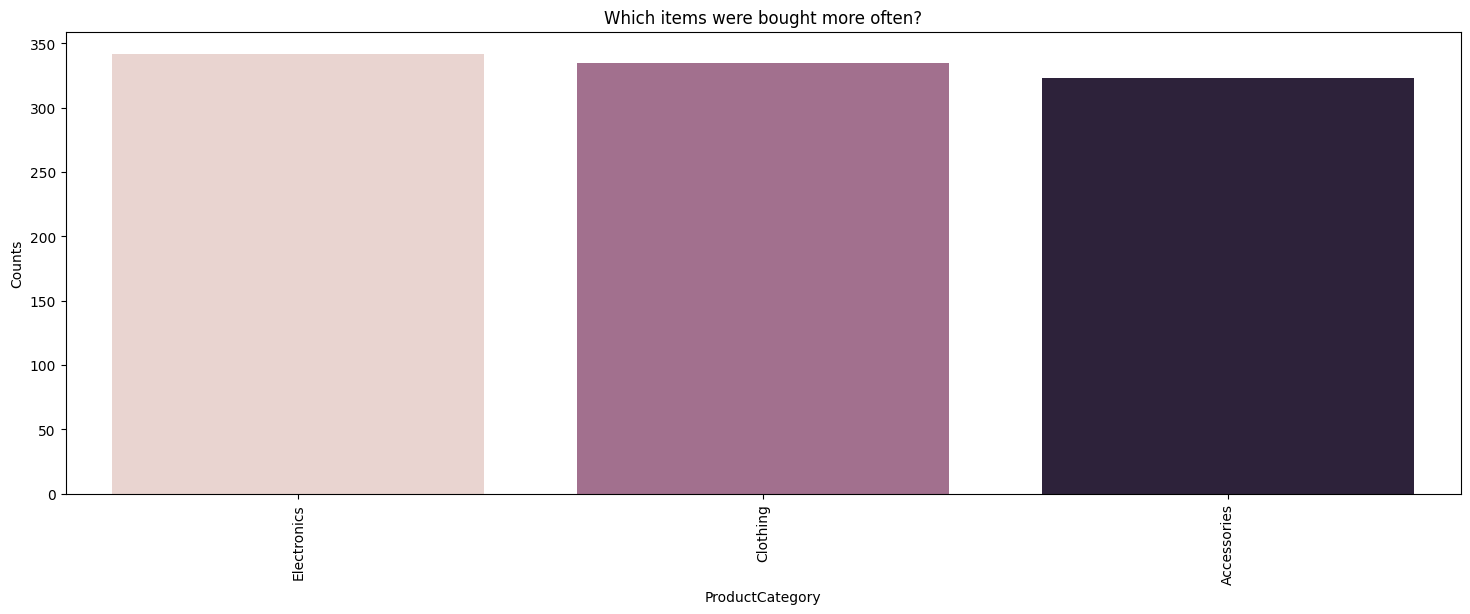

In [1010]:
#Check Best Selling Products Category

item_counts = dataset['ProductCategory'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x = item_counts.index, y = item_counts.values, palette=sns.cubehelix_palette(3))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [1011]:
#Check Products Price Distribution

fig = px.histogram(dataset, x='ProductPrice',
                   title='Products Price Distribution', nbins=20,
                   labels={'ProductPrice': 'Product Prices'},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

#Plot out Figure

fig.update_layout(xaxis_title='Product Price',
                  yaxis_title='Number of products',
                  title_x=0.5,
                  plot_bgcolor='rgba(0,0,0,0)',
                  paper_bgcolor='rgba(240,240,240,1)',
                  xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.7)'))

# Print it out

fig.show()

In [1012]:
# Sales by PurchaseDate

sales_by_date = data.groupby('PurchaseDate')['TotalPrice'].sum().reset_index()

# Plot our Figure

fig = px.line(sales_by_date, x='PurchaseDate', y='TotalPrice',
              title='Sales over Time',
              labels={'TotalPrice': 'Total Sales'},
              line_shape='linear',
              markers=True,
              color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})

# Update layout

fig.update_layout(xaxis_title='Purchase Date',
                  yaxis_title='Total Sales',
                  title_x=0.5,
                  plot_bgcolor='rgba(0,0,0,0)',
                  paper_bgcolor='rgba(240,240,240,1)',
                  xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.7)'))

# Print out our figure

fig.show()

In [1013]:
# Box plot with Plotly

fig = px.box(dataset, x='ProductCategory', y='ProductPrice',
             title='Box Plot of Product Prices by Category',
             labels={'ProductPrice': 'Product Price'},
             color='ProductCategory',
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(xaxis_title='Product Category',
                  yaxis_title='Product Price',
                  title_x=0.5,
                  xaxis=dict(tickangle=-45))

fig.show()

In [1014]:
# Check WeekDays when customer are more likely to purchase a product

# Extract day and hour from PurchaseDate

dataset['DayOfWeek'] = dataset['PurchaseDate'].dt.day_name()
dataset['Hour'] = dataset['PurchaseDate'].dt.hour

# Sales by day and hour

heatmap_data = dataset.groupby(['DayOfWeek', 'Hour'])['TotalPrice'].sum().reset_index()

# Plot our figure

fig = px.imshow(
    heatmap_data.pivot(index='DayOfWeek', columns='Hour', values='TotalPrice'),
    title='Heatmap of Total Sales by Day and Hour',
    labels=dict(x="Hour of Day", y="Day of Week", color="Total Sales"),
    color_continuous_scale='Cividis'
)

fig.update_layout(xaxis_title='Hour of Day',
                  yaxis_title='Day of Week',
                  title_x=0.5)
#Print it out

fig.show()

#Build Machine Learning Model

In [1015]:
# Define features and target variable

X = dataset[['ProductPrice', 'Quantity']]
y = dataset['TotalPrice']

In [1016]:
# Split our dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1017]:
# Initialize the Huber Regressor model which is robust to handle outliers

huber_model = HuberRegressor()

# Fit the model on our training data

huber_model.fit(X_train, y_train)

# Predict on our test data

y_pred = huber_model.predict(X_test)


#Evaluating the Machine Learning Model

In [1021]:
# Calculate Mean Squared Error (MSE)

_mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared

_r2 = r2_score(y_test, y_pred)

# Calculate MAE

_mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE

_rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print('---------------------------------------------------------------')
print(f"Mean Squared Error (MSE): {_mse:.2f}")
print('---------------------------------------------------------------')
print(f"R-squared: {_r2:.2f}")
print('---------------------------------------------------------------')
print(f"Mean Absolute Error (MAE): {_mae:.2f}")
print('---------------------------------------------------------------')
print(f"Root Mean Squared Error (RMSE): {_rmse:.2f}")
print('---------------------------------------------------------------')


---------------------------------------------------------------
Mean Squared Error (MSE): 0.06
---------------------------------------------------------------
R-squared: 0.93
---------------------------------------------------------------
Mean Absolute Error (MAE): 0.18
---------------------------------------------------------------
Root Mean Squared Error (RMSE): 0.25
---------------------------------------------------------------


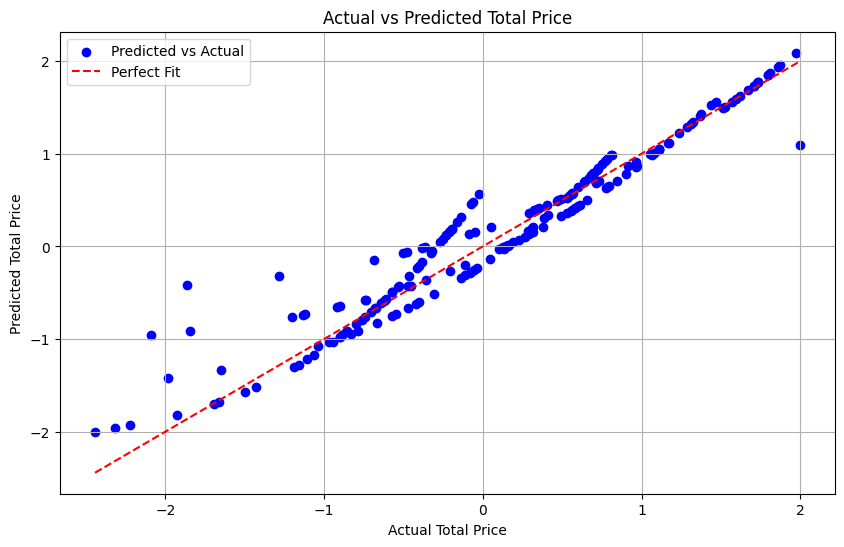

In [1019]:
# Differnce between Actual and predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_huber, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.grid(True)
plt.show()